In [11]:
%matplotlib inline

from IPython.display import HTML

import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import functools

matplotlib.rcParams['figure.figsize'] = 12, 8

# Optimizing a Linear Model with Gradient Descent

In [60]:
gif_url = 'https://gist.githubusercontent.com/jjangsangy/acf1a29ccf75ebb6bfec9a49f121b815/raw/e77f0c7e9591195ddaa71e362a4e1b92dad11aad/image.gif'

HTML('<img src="{}">'.format(gif_url))

In this example we are going to fit a linear regression model using an optimization technique called gradient descent.

Gradient descent is an algorithm used to minimize some convex function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient.

![cost](https://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png)

# Get Data

In [13]:
url = 'https://raw.githubusercontent.com/zhouxc/Stanford-Machine-Learning-Course/master/Linear%20Regression/mlclass-ex1/ex1data1.txt'

data = pd.read_csv(url, names=['population', 'profit'])

In [14]:
X, Y = data.population.values, data.profit.values

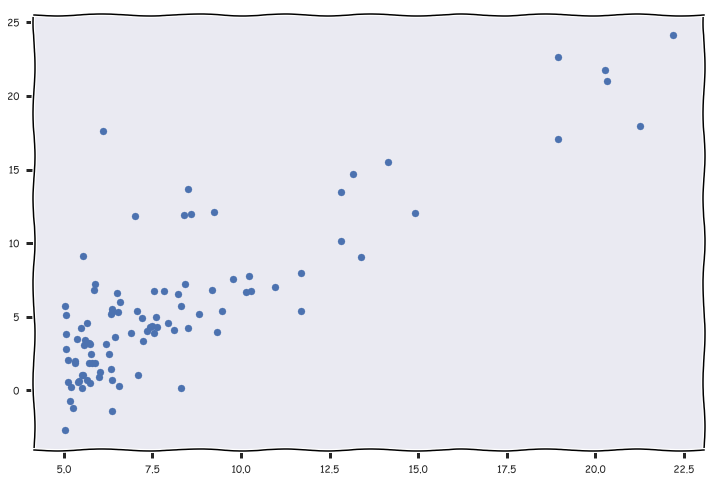

In [15]:
plt.scatter(X, Y);

# Cost Function

A Loss Functions tells us “how good” our model is at making predictions for a given set of parameters. The cost function has its own curve and its own gradients. The slope of this curve tells us how to update our parameters to make the model more accurate.

$$
    f(m,b) =  \frac{1}{2N} \sum_{i=1}^{n} (y_i - (mx_i + b))^2
$$

In [16]:
def compute_cost(m, b, X, Y):
    return np.sum(np.square(Y - (m*X + b))) / float(len(X))

Now let’s run gradient descent using our new cost function. There are two parameters in our cost function we can control: `m` (weight) and `b` (bias).

Since we need to consider the impact each one has on the final prediction, we need to use partial derivatives. We calculate the partial derivatives of the cost function with respect to each parameter and store the results in a gradient.

# Gradient

$$\begin{split}f'(m,b) =
       \begin{bmatrix}
         \frac{df}{dm}\\
         \frac{df}{db}\\
        \end{bmatrix}
    =
       \begin{bmatrix}
         \frac{1}{N} \sum x_i(y_i - (mx_i + b)) \\
         \frac{1}{N} \sum (y_i - (mx_i + b)) \\
        \end{bmatrix}\end{split}
$$

The gradient can be calculated as:

In [56]:
def update_weights(m, b, X, Y, lr):
    N = float(len(X))

    # Compute Partial Derivatives
    dm = np.dot(X, (Y - (m*X + b)))
    db = np.sum(Y - (m*X + b))

    # Move Towards Steepest Descent
    m -= lr * (-dm / N)
    b -= lr * (-db / N)

    return m, b

def run_gradient_descent(X, Y, m=0, b=0, lr=0.02, epochs=30):
    for epoch in range(epochs):
        m, b = update_weights(m, b, X, Y, lr)
    return m, b

To solve for the gradient, we iterate through our data points using our new `m` and `b` values and compute the partial derivatives. This new gradient tells us the slope of our cost function at our current position (current parameter values) and the direction we should move to update our parameters. The size of our update is controlled by the learning rate.

# Plotting Functions

In [57]:
def plot_line(m, b):
    x = np.linspace(min(X), max(X))
    y = m * x + b
    plt.plot(x, y, linewidth=3)

def save_plot(m, b, epoch=0):
    with plt.xkcd():
        plt.scatter(X, Y, alpha=0.8, s=100)
        plt.xlim(xmax=max(X)+1)
        plt.ylim(ymax=max(Y)+1)
        plt.grid(True, which='both')
        plt.title('Gradient Descent Fit')
        plt.xlabel('Population')
        plt.ylabel('Profit')
        plot_line(m, b)
        plt.text(5, 22, 'Loss: {:.3f}'.format(compute_cost(m, b, X, Y)))
        plt.text(5, 20, '$y = {:.3f}x {:+.3f}$'.format(m, b))
        plt.savefig('{:02d}.png'.format(epoch), orientation='landscape')
        plt.show()

# Perform Gradient Descent

In [58]:
m, b = run_gradient_descent(X, Y)

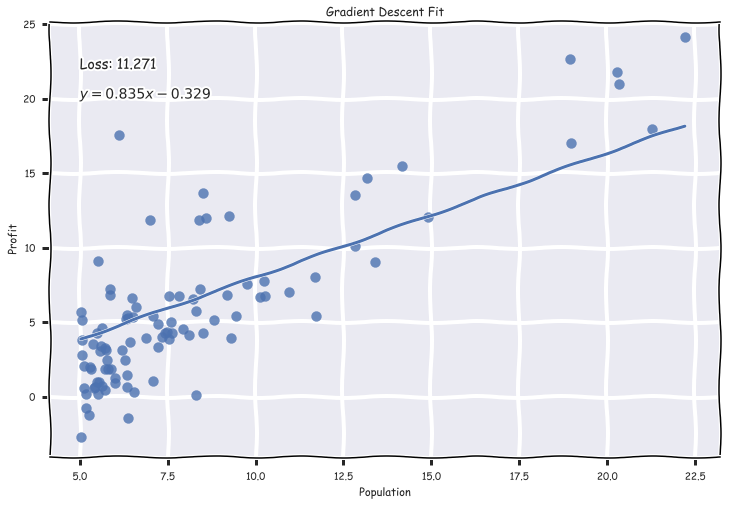

In [59]:
save_plot(m, b)